# Fourier transforms

After looking at the concepts and basics, we are ready to dig into the formalities and mathematics of Fourier transforms. A Fourier transform (FT) is a mathematical transform that decomposes real functions from the time or spatial domain into the Fourier (frequency) domain, revealing the different (temporal or spatial) frequencies present in the signal. The mathematical definition is as follows:

### (Direct) Fourier transform:

$\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x)\ e^{-i 2\pi \xi x}\,dx,\quad \forall\ \xi \in \mathbb R.$


### Inverse Fourier transform:

$f(x) = \int_{-\infty}^{\infty} \hat f(\xi)\ e^{i 2 \pi \xi x}\,d\xi,\quad \forall\ x \in \mathbb R$

# Discrete Fourier transforms (DFT):

Sometimes we don't have analytical functions, but discrete data. In such cases, we may be interested in characterising the spectral information of such data.

The discrete-time Fourier transform of a discrete sequence of real or complex numbers $x[n]$, for all integers $n$, is a Fourier series, which produces a periodic function of a frequency variable. When the frequency variable, $\omega$, has normalized units of radians/sample, the periodicity is $2\pi$, and the Fourier series is:

To do this, we can carry out a Discrete Fourier Transform (DFT), defined as:

$\chi(k) =\sum_{n=0}^{N-1}x(n)\,e^{\frac{-i\,2\pi\,k\,n}{N}}$

where $k=0, ..., N-1$, where

$N$ = number of samples

$n$ = current sample

$k$ = current frequency, where $𝑘\in[0,N−1]$

$x_n$ = the sine value at sample $n$.

$\chi_k$ = The DFT which includes information of both amplitude and phase.

$\chi_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi kn/N}$ of function $x(n)$.


The amplitude and phase of the signal can be calculated as:

$$A = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$$


$$\phi = atan2(Im(X_k), Re(X_k))$$


where $Im(X_k)$ and $Re(X_k)$ are the imagery and real part of the complex number, $atan2$ is the two-argument form of the $arctan$ function. 


In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

#### Python function for the DFT:

$\chi(k) =\sum_{n=0}^{N-1}x(n)\,e^{\frac{-i\,2\pi\,k\,n}{N}}$

In [2]:
def DFT_function(signal):

    # Global parameters
    N = len(signal)
    n = np.arange(0, N)
    k = n.reshape((N, 1))

    # Exponential term
    exp_term = np.exp(-2j*np.pi*k*n/N)

    # Dot Product
    chi = np.dot(exp_term, signal)
    
    return chi

### Example 1:

Find the DFT of x = (0, 1, 2, 3)

#### Analytical calculation:


The Discrete Fourier Transform (DFT) of a sequence $x(n)$ of length $N$ is given by:

$$X(k) = \sum_{n=0}^{N-1} x(n) e^{-j \frac{2\pi}{N} kn}, \quad k = 0, 1, ..., N-1$$

For $x(n) = (0, 1, 2, 3)$, we have $N = 4$, $j = \sqrt{-1}$.


Let's analytically calculate each DFT coefficient $X(k)$:

**For k = 0:**
$$X(0) = \sum_{n=0}^{3} x(n) e^{-j \frac{2\pi}{4} (0)n} = x(0)e^0 + x(1)e^0 + x(2)e^0 + x(3)e^0$$
$$X(0) = 0 \cdot 1 + 1 \cdot 1 + 2 \cdot 1 + 3 \cdot 1 = 0 + 1 + 2 + 3 = 6$$

**For k = 1:**
$$X(1) = \sum_{n=0}^{3} x(n) e^{-j \frac{2\pi}{4} (1)n} = x(0)e^0 + x(1)e^{-j \frac{\pi}{2}} + x(2)e^{-j \pi} + x(3)e^{-j \frac{3\pi}{2}}$$
$$X(1) = 0 \cdot 1 + 1 \cdot (-j) + 2 \cdot (-1) + 3 \cdot (j) = 0 - j - 2 + 3j = -2 + 2j$$

**For k = 2:**
$$X(2) = \sum_{n=0}^{3} x(n) e^{-j \frac{2\pi}{4} (2)n} = x(0)e^0 + x(1)e^{-j \pi} + x(2)e^{-j 2\pi} + x(3)e^{-j 3\pi}$$
$$X(2) = 0 \cdot 1 + 1 \cdot (-1) + 2 \cdot (1) + 3 \cdot (-1) = 0 - 1 + 2 - 3 = -2$$

**For k = 3:**
$$X(3) = \sum_{n=0}^{3} x(n) e^{-j \frac{2\pi}{4} (3)n} = x(0)e^0 + x(1)e^{-j \frac{3\pi}{2}} + x(2)e^{-j 3\pi} + x(3)e^{-j \frac{9\pi}{2}}$$
$$X(3) = 0 \cdot 1 + 1 \cdot (j) + 2 \cdot (-1) + 3 \cdot (-j) = 0 + j - 2 - 3j = -2 - 2j$$

Therefore, the DFT of $x(n) = (0, 1, 2, 3)$ is:

$$X(k) = (6, -2 + 2j, -2, -2 - 2j)$$


In [3]:
# Set up original signal
signal_1 = np.arange(0, 4, 1)

print(signal_1)

[0 1 2 3]


In [4]:
# DFT calculation
fourier_1 = DFT_function(signal_1)

print(fourier_1)

[ 6.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]


## DFT using numpy.fft():

- 1D FFT function: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

- FFT frequencies: https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

In [5]:
# DFT using Numpy:
fourier_2 = np.fft.fft(signal_1)

print(fourier_2)


# Frequencies:
freqs_2 = np.fft.fftfreq(signal_1.size, d=1) # d = 1 in this case, so it is ommitted

print(freqs_2)

[ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]
[ 0.    0.25 -0.5  -0.25]


## DFT using scipy.fft():

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [6]:
from scipy import fft

In [7]:
fourier_3 = fft.fft(signal_1)

print(fourier_3)

#frequencies:
freqs_3 = fft.fftfreq(signal_1.size)

print(freqs_3)

[ 6.-0.j -2.+2.j -2.-0.j -2.-2.j]
[ 0.    0.25 -0.5  -0.25]


## Inverse DFT

$x(n)= \frac{1}{N}\sum^{N-1}_{k=0}X_k\,e^{i\,2\pi\,k\,n/N}$



In [8]:
def invDFT_function(any_fourier):

    # Global parameters
    N = len(any_fourier)
    n = np.arange(0, N)
    k = n.reshape((N, 1))

    # Exponential term
    exp_term = np.exp(2j * np.pi * k * n / N)

    # Back to Real Space
    x_n = np.dot(exp_term, any_fourier)
    
    return x_n/N

### For our first example:

In [9]:
print(fourier_1)

[ 6.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]


In [10]:
# Using our own function:

x_n1 = invDFT_function(fourier_1)

print("x_n =", np.abs(x_n1))

x_n = [5.1191594e-16 1.0000000e+00 2.0000000e+00 3.0000000e+00]


In [11]:
# Using iFFT from numpy

x_np = np.fft.ifft(fourier_1)

print("x_n =", np.abs(x_np))

x_n = [5.1191594e-16 1.0000000e+00 2.0000000e+00 3.0000000e+00]


## Example 2:

Calculate the DFT of the following series using our own function:

$y(t)=\sum_i^n i\,\cos(i\alpha\,t)$, with $\alpha = 20\pi$

We already know the answer since we computed this using np.fft here:

https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-4/401-Fourier-Analysis.ipynb

In [12]:
def function_series(t, a, n):
    # t - time axis
    # a = 20*pi
    # n is a free parameter, from 0 to n
    
    nu = []
    f = np.zeros(t.size)
    
    for i in range(n+1):
        
        y = i*np.cos(i*a*t)
        
        #Analytical frequencies
        nu.append(i*a/(2*np.pi))
        
        f += y
        
    nu = np.array(nu)
    
    return f, nu

### Axes:

In [13]:
# sampling rate
s_rate = 10000

# sampling interval
t_s = 1.0/s_rate

# x-axis
t = np.arange(0,np.pi,t_s)

#print(t_s, t.size)

# Frequencies and n=5

n = 5
w = 20*np.pi

yy, nu = function_series(t, w, n)

### Frequencies:

In [14]:
print("frequencies in Hz:", nu)

frequencies in Hz: [ 0. 10. 20. 30. 40. 50.]


### Signal plot:

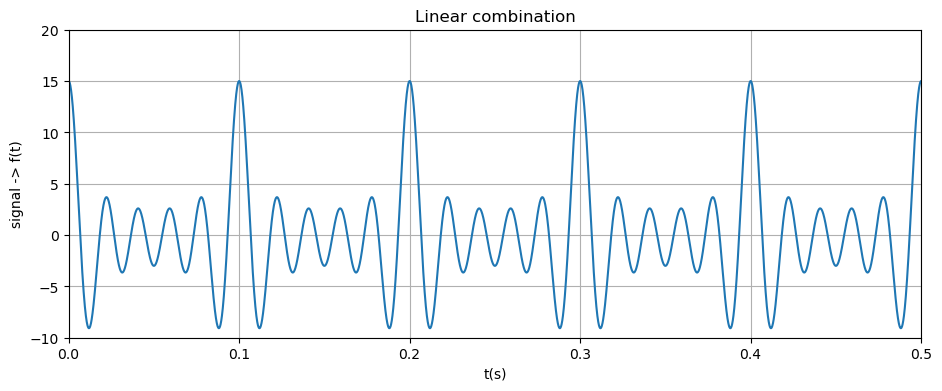

In [15]:
#plotting
axes_range = [0, 0.5, -10, 20]
plt.figure(figsize = (11, 4))

plt.plot(t, yy)

plt.title('Linear combination')

plt.xlabel('t(s)')
plt.ylabel('signal -> f(t)')
plt.axis(axes_range)
plt.grid()
plt.show()

### Fourier transform:

In [16]:
import time

In [17]:
# Numpy implementation with the FFT algorithm: np.fft.fft
start_np = time.time()
X_fourier = np.fft.fft(yy)
end_np = time.time()

print("Elapsed time for numpy: ", end_np - start_np)

Elapsed time for numpy:  0.0006399154663085938


In [18]:
print(X_fourier)

[47.25254762 +0.j         47.31113547+14.44892875j
 47.48780385+28.95939594j ... 47.78529699-43.59413336j
 47.48780385-28.95939594j 47.31113547-14.44892875j]


In [19]:
# Fourier transform using our own function with the DFT algorithm
start_dft = time.time()
X_fourier = DFT_function(yy)
end_dft = time.time()

print("Elapsed time for out DFT function: ", end_dft - start_dft)

Elapsed time for out DFT function:  12.63102912902832


In [20]:
print(X_fourier)

[47.25254762 +0.j         47.31113547+14.44892875j
 47.48780385+28.95939594j ... 47.78529699-43.59413336j
 47.48780385-28.95939594j 47.31113547-14.44892875j]


### Frequencies:

In [21]:
N = len(X_fourier)
#print(N)

n = np.arange(N)
#print(n)

T = N/s_rate
#print(T)

freq = n/T

### Fourier plot:

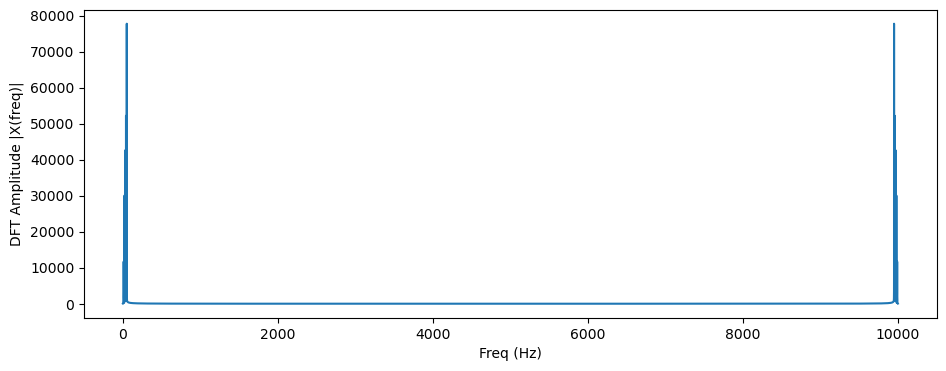

In [22]:
plt.figure(figsize=(11,4))

plt.plot(freq, abs(X_fourier))

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

### Characteristic frequencies:

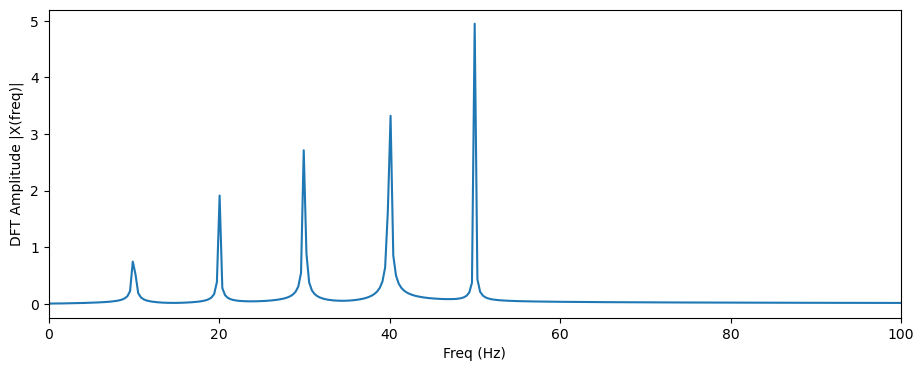

In [23]:
plt.figure(figsize=(11,4))

plt.plot(freq[:N//2], (abs(X_fourier)[:N//2])/(N//2))

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.xlim(0,100)
plt.show()

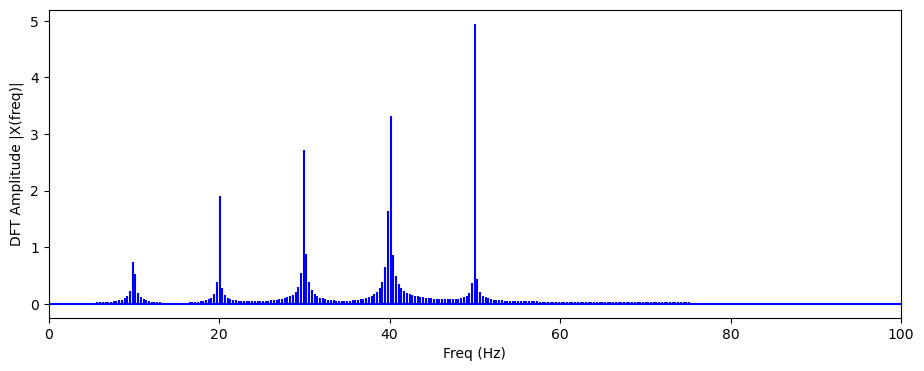

In [24]:
plt.figure(figsize=(11,4))

plt.stem(freq[:N//2], (abs(X_fourier)[:N//2])/(N//2), "b", markerfmt=" ", basefmt="-b")

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.xlim(0,100)
plt.show()

In [25]:
from scipy.signal import find_peaks

In [26]:
amp_Fm = (abs(X_fourier)[:N//2])/(N//2)

peaks, properties = find_peaks(amp_Fm, height=0)

print(peaks)

[ 31  63  94 126 157]


In [27]:
print("Characteristic frequencies: ", freq[:N//2][peaks])

Characteristic frequencies:  [ 9.8675834  20.05347594 29.92105933 40.10695187 49.97453527]


In [28]:
print("Analytical frequencies in Hz:", nu)

Analytical frequencies in Hz: [ 0. 10. 20. 30. 40. 50.]
